In [66]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

In [46]:
def count_word_frequency(text, common_words=None):
    # Initialize the stemmer
    lemmatizer = WordNetLemmatizer()
    
    if common_words is None:
        common_words = set()
    
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    
    # Split the text into words
    words = text.split()

    # Lemmatize the words and filter out common words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in common_words]

    # Count the frequency of each word
    word_counts = Counter(lemmatized_words)
    return word_counts

In [30]:
cad_df = pd.read_csv("CAD_Master.csv")
cad_df.tail()

,Volume,Date,para_id,std_name,uid,No_uid,content
39065,12,1950-01-24,12.1.47,Unnamed Members,k9u,1,Bande Mataram.
39066,12,1950-01-24,12.1.48,Shri M. Ananthasayanam Ayyangar,k4o,148,"All of us will sing, with Your permission..."
39067,12,1950-01-24,12.1.49,Dr. Rajendra Prasad,c4b,80,Yes.(Shrimati Purnima Banerji with other Me...
39068,12,1950-01-24,12.1.50,Dr. Rajendra Prasad,c4b,80,"""Bande Mataram"". (Pandit Lakshmi Kanta Mait..."
39069,12,1950-01-24,12.1.51,Dr. Rajendra Prasad,c4b,80,"The House will stand adjourned now, sine ..."


In [49]:
cad_df['content'] = cad_df['content'].astype(str)

In [50]:
cad_volumegroup = cad_df.groupby('Volume')['content'].apply(' '.join).reset_index()
cad_volumegroup.head()

,Volume,content
0,1,(in requesting Dr. Sachchidananda Sinha to tak...
1,2,The Constituent Assembly of India met in the C...
2,3,The following Members presented their cre...
3,4,Members who have not yet presented their crede...
4,5,The Fifth Session of the Constituent Assembly ...


In [52]:
common_words = stopwords.words('english')

In [113]:
dfs = []
for i in tqdm(cad_volumegroup['Volume']):
    text = cad_volumegroup['content'][i-1]
    counts = count_word_frequency(text, common_words)
    counts_df = pd.DataFrame(counts.items(), columns=['word', 'freq'])
    counts_df['Volume'] = int(i)
    dfs.append(counts_df)
    

100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


In [114]:
vol_word_freq = pd.concat(dfs).reset_index(drop=True)
vol_word_freq.head()

,word,freq,Volume
0,requesting,1,1
1,dr,197,1
2,sachchidananda,12,1
3,sinha,45,1
4,take,164,1


In [115]:
vol_dates = pd.DataFrame()
start_dates = ['09-12-1946', '20-01-1947', '28-04-1947', '14-07-1947', '14-08-1947',
            '27-01-1948', '04-11-1948',
            '16-05-1949', '30-07-1949', '06-10-1949', '14-11-1949',
              '24-01-1950']
vol_dates['start_dates'] = start_dates
vol_dates['Volume'] = cad_volumegroup['Volume']

In [116]:
vol_word_freq = vol_word_freq.merge(vol_dates, on='Volume')
vol_word_freq['start_dates'] = pd.to_datetime(vol_word_freq['start_dates'], format='mixed')

In [117]:
vol_word_freq.to_csv('Volumewise_wordfreq.csv', index=False)

In [118]:
vol_word_freq

,word,freq,Volume,start_dates
0,requesting,1,1,1946-09-12
1,dr,197,1,1946-09-12
2,sachchidananda,12,1,1946-09-12
3,sinha,45,1,1946-09-12
4,take,164,1,1946-09-12
...,...,...,...,...
98279,maitra,1,12,1950-01-24
98280,adjourned,2,12,1950-01-24
98281,sine,2,12,1950-01-24
98282,diethe,1,12,1950-01-24


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt


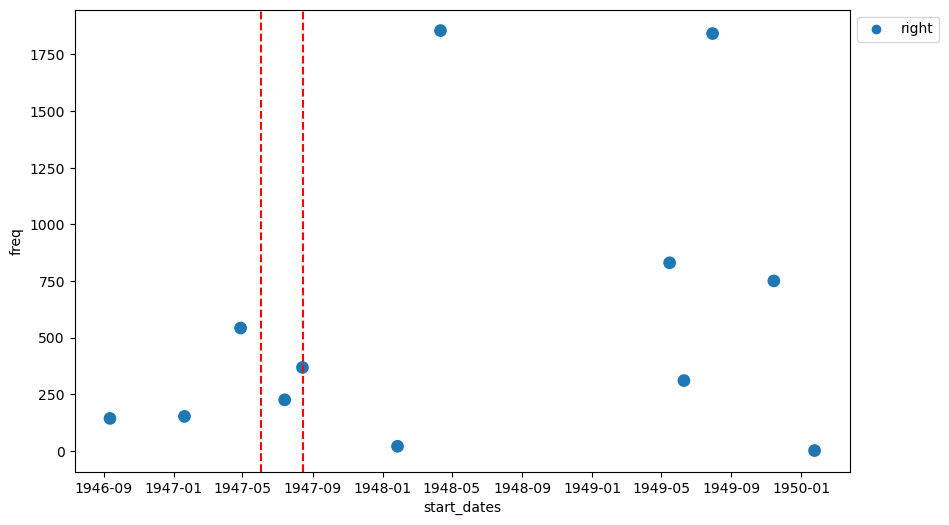

In [168]:
plt.figure(figsize=(10, 6))
exclude_words = ['india','member','indian','chairman','assembly', 'another','district','shall','place','motion','given','provision','taken','necessary',
                 'house','honble','state','great','therefore','matter','committee','certain','minister','friend','moved','system','vicepresident','thing',
                'resolution','clause','president','would','report','order','honourable','first','stand','cannot', 'paragraph','following','might','possible',
                'think','submit','whether','point','already','subject','schedule','scheduled','second','whole','regard','number','could',
                'today', 'different', 'article', 'question', ' principle', 'every','draft', 'drafting']

include_words = ['right','province','constitution','power','governor','reason','government','election','legislature','union',
                'language','fundamental','emergency', 'tax', 'central','minority','justice','religion',
                 'hindi','person']
include_words = ['right']
data = vol_word_freq[(vol_word_freq['word'].isin(include_words))]
sns.scatterplot(data=data, x='start_dates', y='freq', hue='word', style='word', s=100)
plt.axvline(x = pd.to_datetime('1947-06-03'), color='r', linestyle='--')
plt.axvline(x = pd.to_datetime('1947-08-15'), color='r', linestyle='--')
# Place legend outside the box
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [155]:
data[data.word =='government']

,word,freq,Volume,start_dates
44,government,184,1,1946-09-12
5978,government,70,2,1947-01-20
10343,government,177,3,1947-04-28
14926,government,467,4,1947-07-14
22484,government,527,5,1947-08-14
29827,government,35,6,1948-01-27
32588,government,1730,7,1948-04-11
48744,government,1155,8,1949-05-16
60980,government,2706,9,1949-07-30
78352,government,697,10,1949-06-10
